# Project 3 - Chicago Crime Analysis 

## Part 1 - Analyzing Crime Data 

### Loading data, imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates


In [11]:
df = pd.read_csv(r'C:\Users\o2bgo\Downloads\Crimes_-_2001_to_Present_20240907.csv')

In [4]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [4]:
df = df.drop(['X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude','Longitude', 'IUCR','Case Number', 'ID'], axis=1)
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Location
0,03/18/2015 12:00:00 PM,0000X W WACKER DR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1.0,42.0,32.0,11,NaN
1,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25.0,36.0,19.0,11,NaN
2,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN
3,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,33.0,14.0,08A,NaN
4,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,22.0,21.0,71.0,11,NaN


In [5]:
df = df.drop(['Ward', 'Beat', 'FBI Code', 'Description', 'Domestic','Location'], axis=1)
df.head()

,Date,Block,Primary Type,Location Description,Arrest,District,Community Area
0,03/18/2015 12:00:00 PM,0000X W WACKER DR,DECEPTIVE PRACTICE,BANK,False,1.0,32.0
1,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,DECEPTIVE PRACTICE,APARTMENT,False,25.0,19.0
2,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,DECEPTIVE PRACTICE,NaN,False,8.0,63.0
3,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,OTHER OFFENSE,RESIDENCE,False,17.0,14.0
4,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,DECEPTIVE PRACTICE,RESIDENCE,False,22.0,71.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147943 entries, 0 to 8147942
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Block                 object 
 2   Primary Type          object 
 3   Location Description  object 
 4   Arrest                bool   
 5   District              float64
 6   Community Area        float64
dtypes: bool(1), float64(2), object(4)
memory usage: 380.8+ MB


In [7]:
date_format = "%m/%d/%Y %H:%M:%S %p"

df['Datetime'] = pd.to_datetime(df['Date'], format=date_format)

In [8]:
df = df.drop('Date', axis = 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147943 entries, 0 to 8147942
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Block                 object        
 1   Primary Type          object        
 2   Location Description  object        
 3   Arrest                bool          
 4   District              float64       
 5   Community Area        float64       
 6   Datetime              datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(2), object(3)
memory usage: 380.8+ MB


In [10]:
df = df.set_index('Datetime')

In [11]:
df = df.sort_values('Datetime')
df.head()

,Block,Primary Type,Location Description,Arrest,District,Community Area
Datetime,,,,,,
2001-01-01 01:00:00,032XX N SHEFFIELD AV,THEFT,TAVERN/LIQUOR STORE,False,19.0,NaN
2001-01-01 01:00:00,025XX W ROOSEVELT RD,WEAPONS VIOLATION,STREET,False,11.0,NaN
2001-01-01 01:00:00,109XX S MICHIGAN AV,MOTOR VEHICLE THEFT,STREET,False,5.0,NaN
2001-01-01 01:00:00,023XX S TROY ST,CRIMINAL DAMAGE,STREET,False,10.0,NaN
2001-01-01 01:00:00,016XX N HUMBOLDT BL,THEFT,STREET,False,14.0,NaN


### Crimes Per District in 2022

In [12]:
ts_2022 = df.loc['2022']
ts_2022

,Block,Primary Type,Location Description,Arrest,District,Community Area
Datetime,,,,,,
2022-01-01 01:00:00,007XX E 114TH ST,CRIMINAL DAMAGE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,5.0,50.0
2022-01-01 01:00:00,006XX N CLARK ST,MOTOR VEHICLE THEFT,PARKING LOT / GARAGE (NON RESIDENTIAL),False,18.0,8.0
2022-01-01 01:00:00,008XX W 75TH ST,MOTOR VEHICLE THEFT,STREET,False,6.0,71.0
2022-01-01 01:00:00,029XX N HAMLIN AVE,OTHER OFFENSE,STREET,False,25.0,21.0
2022-01-01 01:00:00,010XX W NORTH AVE,THEFT,OTHER (SPECIFY),False,18.0,7.0
...,...,...,...,...,...,...
2022-12-31 12:50:00,018XX S HAMLIN AVE,ASSAULT,APARTMENT,False,10.0,29.0
2022-12-31 12:50:00,070XX S GREEN ST,ASSAULT,APARTMENT,False,7.0,68.0
2022-12-31 12:52:00,010XX S WESTERN AVE,BATTERY,BARBERSHOP,False,11.0,28.0


In [13]:
ts_2022.isna().sum()

Block                     0
Primary Type              0
Location Description    958
Arrest                    0
District                  0
Community Area            0
dtype: int64

In [14]:
ts_dis = ts_2022.groupby('District').size().sort_values(ascending=False)
ts_dis

District
8.0     14842
6.0     14732
12.0    14381
4.0     13977
11.0    13510
1.0     13086
18.0    12471
19.0    12299
25.0    11987
3.0     11939
2.0     11819
9.0     10391
7.0     10333
10.0     9999
5.0      9811
16.0     9263
24.0     8490
15.0     8319
14.0     8175
22.0     7696
17.0     7007
20.0     4975
31.0       15
dtype: int64

C:\Users\o2bgo\AppData\Local\Temp\ipykernel_22128\2376917862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='District', data=ts_2022, palette='viridis')


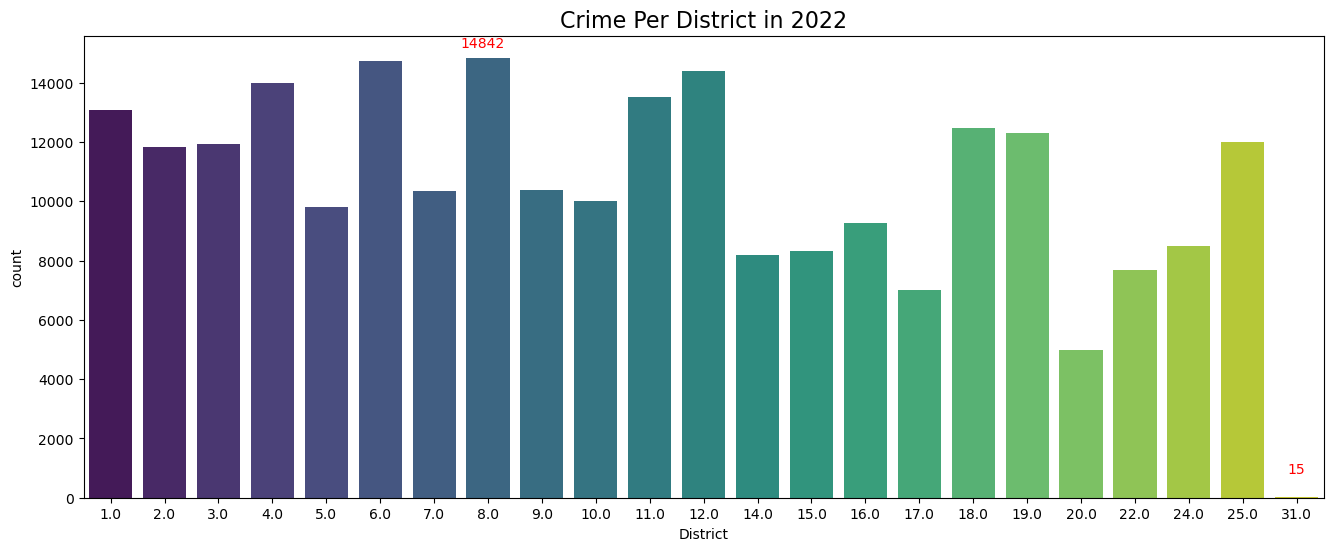

In [15]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='District', data=ts_2022, palette='viridis')
plt.title('Crime Per District in 2022', fontsize=16)

# Annotate highest value
max_district = ts_2022['District'].value_counts().idxmax()
max_count = ts_2022['District'].value_counts().max()
ax.annotate(f'{max_count}', xy=(int(max_district) - 1.1, max_count), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='red')

# Annotate lowest value
min_district = ts_2022['District'].value_counts().idxmin()
min_count = ts_2022['District'].value_counts().min()

# Find the position of the minimum district
min_district_pos = ts_2022['District'].value_counts().index.get_loc(min_district)
ax.annotate(f'{min_count}', xy=(min_district_pos, min_count), xytext=(0, 15), textcoords='offset points', ha='center', va='bottom', fontsize=10, color='red')


plt.show()

*The plot shows that during 2022 District 8 had the highest number of crimes with 14,842 and District 31 had the lowest number of recorded crimes with 15.* 

### Crimes Across the Years:

In [16]:
df['Year']  = df.index.year
df = df.loc[:'2023'].copy()


In [17]:
df['Year'].count()

7977860

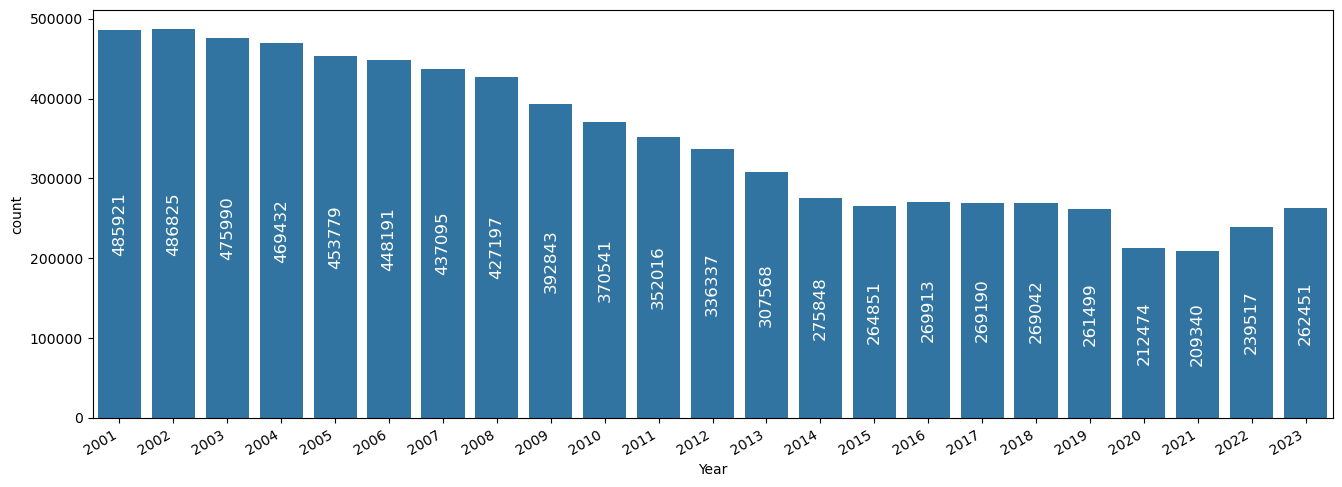

In [18]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=df, x='Year')

for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()/2), ha='center', va='center', xytext=(0, 0), textcoords='offset points', rotation=90, color='white', fontsize=12)

fig = ax.get_figure()
fig.autofmt_xdate()

*The year 2002 had the highest number of crimes recorded with 486,825 while the year 2021 had the lowest with 209,340.*

In [19]:
df2 = df.groupby('Year').size().reset_index(name='Count')
df2.set_index('Year')

,Count
Year,
2001,485921
2002,486825
2003,475990
2004,469432
2005,453779
2006,448191
2007,437095
2008,427197
2009,392843


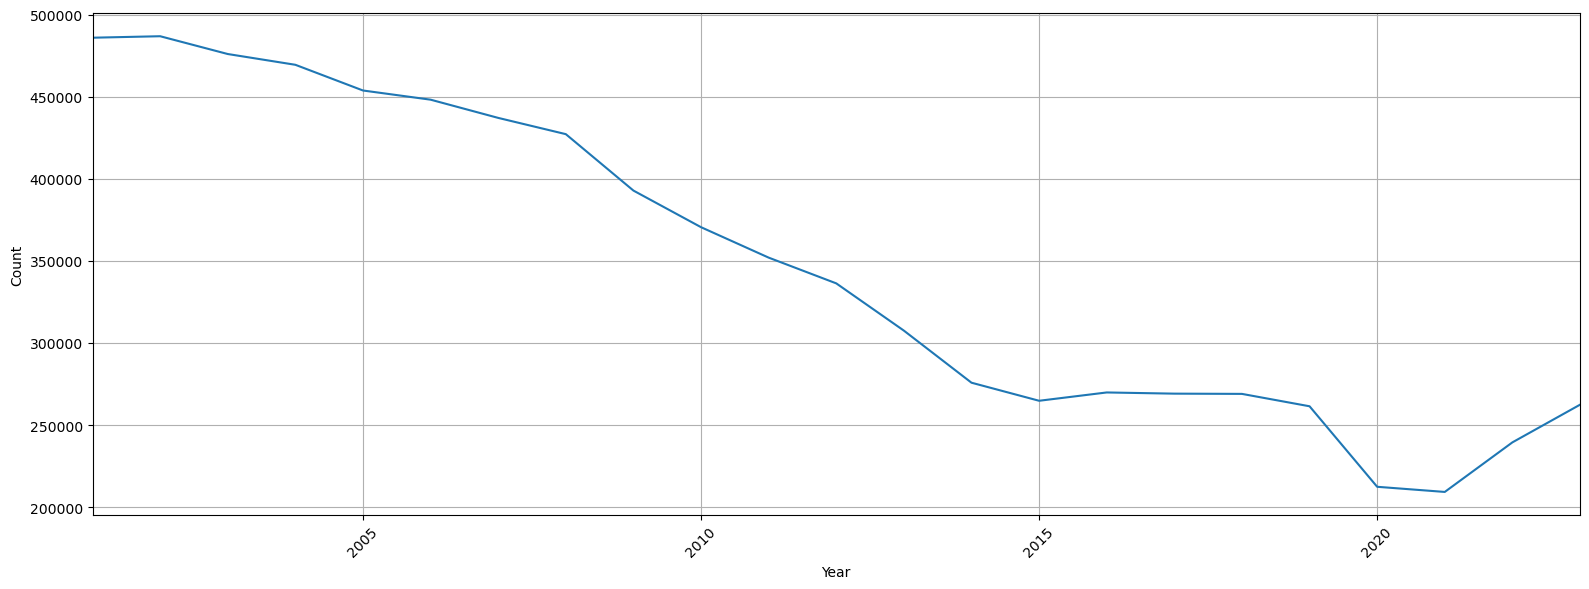

In [20]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=df2, x='Year', y='Count')

ax.set_xticks(ax.get_xticks())

plt.xticks(rotation=45)

ax.grid(True)
plt.margins(x=0)
plt.tight_layout()
plt.show()


*The plot shows that the number of crimes decreased stedily between 2001 and 2020, then stagnated and started increasing again.*

#### Crime types accross the years 

In [21]:
crime_counts = df['Primary Type'].value_counts().to_frame('Total # of Crimes')
crime_counts.style.bar('Total # of Crimes')

,Total # of Crimes
Primary Type,
THEFT,1684544
BATTERY,1455152
CRIMINAL DAMAGE,909006
NARCOTICS,751735
ASSAULT,523743
OTHER OFFENSE,494929
BURGLARY,429732
MOTOR VEHICLE THEFT,395849
DECEPTIVE PRACTICE,359361


In [22]:
df.groupby('Primary Type').size().head()

Primary Type
ARSON                                  13634
ASSAULT                               523743
BATTERY                              1455152
BURGLARY                              429732
CONCEALED CARRY LICENSE VIOLATION       1224
dtype: int64

In [23]:
crime_list = df['Primary Type'].unique()
crime_list

array(['THEFT', 'WEAPONS VIOLATION', 'MOTOR VEHICLE THEFT',
       'CRIMINAL DAMAGE', 'BATTERY', 'CRIM SEXUAL ASSAULT', 'GAMBLING',
       'SEX OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION', 'OTHER OFFENSE', 'NARCOTICS', 'ASSAULT',
       'BURGLARY', 'DECEPTIVE PRACTICE', 'LIQUOR LAW VIOLATION',
       'ROBBERY', 'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER',
       'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING',
       'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [24]:
CRIMES = {}
#Loop through the list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = df.loc[ df['Primary Type']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
   temp_res = temp.resample("YE").size().interpolate() 
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy() 
CRIMES.keys()

dict_keys(['THEFT', 'WEAPONS VIOLATION', 'MOTOR VEHICLE THEFT', 'CRIMINAL DAMAGE', 'BATTERY', 'CRIM SEXUAL ASSAULT', 'GAMBLING', 'SEX OFFENSE', 'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION', 'OTHER OFFENSE', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'DECEPTIVE PRACTICE', 'LIQUOR LAW VIOLATION', 'ROBBERY', 'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING', 'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'])

In [25]:
crimes_df = pd.DataFrame(CRIMES)


In [26]:
crimes_df['Overall'] = crimes_df.sum(axis=1)
crimes_df

,THEFT,WEAPONS VIOLATION,MOTOR VEHICLE THEFT,CRIMINAL DAMAGE,BATTERY,CRIM SEXUAL ASSAULT,GAMBLING,SEX OFFENSE,OFFENSE INVOLVING CHILDREN,PUBLIC PEACE VIOLATION,...,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL,Overall
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-12-31,99284,4278,27555,55863,93467,1776.0,934,2238,2265,2750,...,1.0,19,6,9,1,NaN,NaN,NaN,NaN,485921.0
2002-12-31,98334,4282,25121,55942,94153,1804.0,971,2173,2597,2457,...,NaN,26,5,8,0,NaN,NaN,NaN,NaN,486825.0
2003-12-31,98876,4211,22749,55011,88380,1568.0,1088,2078,3047,2430,...,NaN,16,2,6,0,1.0,NaN,NaN,NaN,475990.0
2004-12-31,95464,4298,22805,53164,87136,1530.0,1122,1805,3103,2495,...,NaN,13,9,9,0,0.0,NaN,NaN,NaN,469432.0
2005-12-31,85684,4106,22497,54548,83964,1516.0,1078,1817,2909,2730,...,NaN,19,9,4,0,0.0,NaN,NaN,NaN,453779.0
2006-12-31,86241,3821,21818,57124,80666,1437.0,1368,1576,2787,3068,...,NaN,17,9,4,0,0.0,NaN,NaN,NaN,448191.0
2007-12-31,85156,3554,18573,53749,79593,1506.0,1409,1530,2919,3315,...,NaN,12,12,5,0,0.0,NaN,NaN,NaN,437095.0
2008-12-31,88437,3877,18881,52843,75930,1508.0,1199,1503,2667,3013,...,NaN,13,12,4,0,0.0,NaN,NaN,NaN,427197.0
2009-12-31,80976,4159,15482,47725,68458,1393.0,991,1268,2634,3147,...,NaN,21,7,10,0,1.0,NaN,NaN,NaN,392843.0


In [32]:
cr_diff = crimes_df.diff()
cr_diff

,THEFT,WEAPONS VIOLATION,MOTOR VEHICLE THEFT,CRIMINAL DAMAGE,BATTERY,CRIM SEXUAL ASSAULT,GAMBLING,SEX OFFENSE,OFFENSE INVOLVING CHILDREN,PUBLIC PEACE VIOLATION,...,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL,Overall
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-12-31,-950.0,4.0,-2434.0,79.0,686.0,28.0,37.0,-65.0,332.0,-293.0,...,NaN,7.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,NaN,904.0
2003-12-31,542.0,-71.0,-2372.0,-931.0,-5773.0,-236.0,117.0,-95.0,450.0,-27.0,...,NaN,-10.0,-3.0,-2.0,0.0,NaN,NaN,NaN,NaN,-10835.0
2004-12-31,-3412.0,87.0,56.0,-1847.0,-1244.0,-38.0,34.0,-273.0,56.0,65.0,...,NaN,-3.0,7.0,3.0,0.0,-1.0,NaN,NaN,NaN,-6558.0
2005-12-31,-9780.0,-192.0,-308.0,1384.0,-3172.0,-14.0,-44.0,12.0,-194.0,235.0,...,NaN,6.0,0.0,-5.0,0.0,0.0,NaN,NaN,NaN,-15653.0
2006-12-31,557.0,-285.0,-679.0,2576.0,-3298.0,-79.0,290.0,-241.0,-122.0,338.0,...,NaN,-2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,-5588.0
2007-12-31,-1085.0,-267.0,-3245.0,-3375.0,-1073.0,69.0,41.0,-46.0,132.0,247.0,...,NaN,-5.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN,-11096.0
2008-12-31,3281.0,323.0,308.0,-906.0,-3663.0,2.0,-210.0,-27.0,-252.0,-302.0,...,NaN,1.0,0.0,-1.0,0.0,0.0,NaN,NaN,NaN,-9898.0
2009-12-31,-7461.0,282.0,-3399.0,-5118.0,-7472.0,-115.0,-208.0,-235.0,-33.0,134.0,...,NaN,8.0,-5.0,6.0,0.0,1.0,NaN,NaN,NaN,-34354.0


In [67]:
df_sum = cr_diff.sum()
df_total = pd.DataFrame(df_sum).transpose()


In [48]:
df_positive = df_total.loc[:, (df_total >= 0).all()]
df_positive

,WEAPONS VIOLATION,MOTOR VEHICLE THEFT,DECEPTIVE PRACTICE,INTERFERENCE WITH PUBLIC OFFICER,STALKING,CRIMINAL SEXUAL ASSAULT,DOMESTIC VIOLENCE,OBSCENITY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
0,4329.0,1694.0,2095.0,179.0,318.0,1602.0,0.0,20.0,204.0,2.0,7.0,1.0,2.0


In [49]:
positive_columns = df_positive.columns.tolist()
print(positive_columns)

['WEAPONS VIOLATION', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE', 'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'CRIMINAL SEXUAL ASSAULT', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL']


In [51]:

non_decreasing_crimes = ['WEAPONS VIOLATION', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE', 'INTERFERENCE WITH PUBLIC OFFICER', 'STALKING', 'CRIMINAL SEXUAL ASSAULT', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL']

# Create a DataFrame with the selected crimes and the 'overall' column
crimes_dec = crimes_df[non_decreasing_crimes + ['Overall']]

In [52]:
crimes_dec

,WEAPONS VIOLATION,MOTOR VEHICLE THEFT,DECEPTIVE PRACTICE,INTERFERENCE WITH PUBLIC OFFICER,STALKING,CRIMINAL SEXUAL ASSAULT,DOMESTIC VIOLENCE,OBSCENITY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL,Overall
Datetime,,,,,,,,,,,,,,
2001-12-31,4278,27555,14953,406,204,36,1.0,19,1,NaN,NaN,NaN,NaN,485921.0
2002-12-31,4282,25121,13738,361,200,33,NaN,26,0,NaN,NaN,NaN,NaN,486825.0
2003-12-31,4211,22749,13461,409,247,46,NaN,16,0,1.0,NaN,NaN,NaN,475990.0
2004-12-31,4298,22805,13257,531,215,52,NaN,13,0,0.0,NaN,NaN,NaN,469432.0
2005-12-31,4106,22497,13592,615,192,43,NaN,19,0,0.0,NaN,NaN,NaN,453779.0
2006-12-31,3821,21818,13611,758,186,50,NaN,17,0,0.0,NaN,NaN,NaN,448191.0
2007-12-31,3554,18573,14176,677,213,57,NaN,12,0,0.0,NaN,NaN,NaN,437095.0
2008-12-31,3877,18881,14935,580,190,58,NaN,13,0,0.0,NaN,NaN,NaN,427197.0
2009-12-31,4159,15482,13885,573,168,54,NaN,21,0,1.0,NaN,NaN,NaN,392843.0


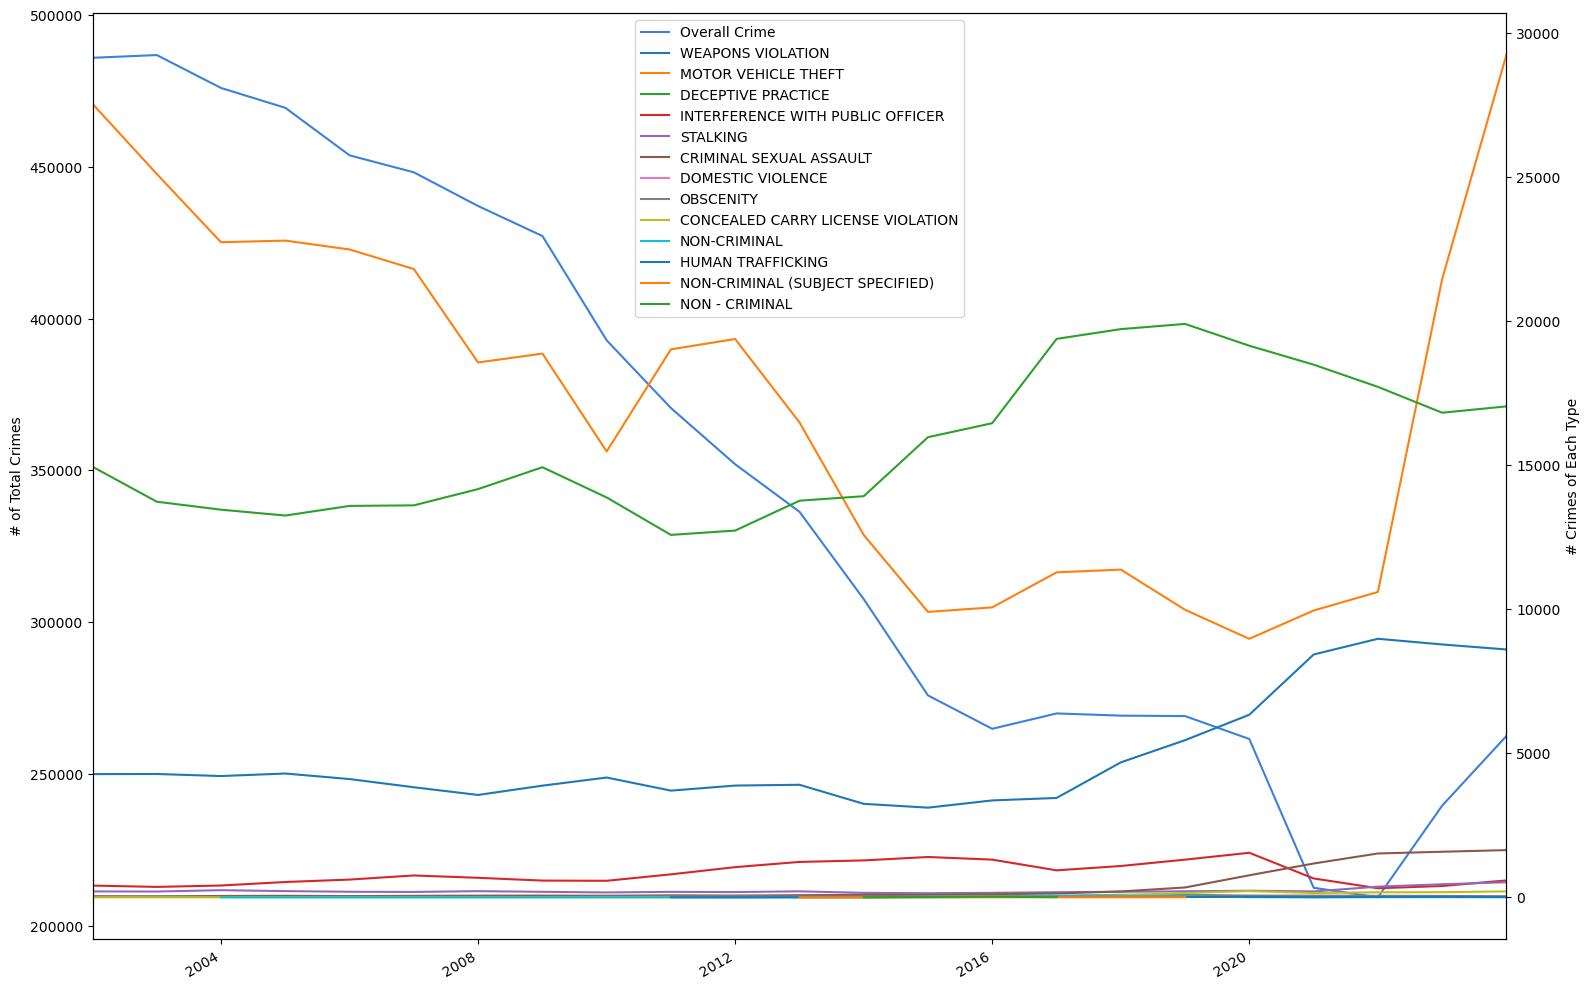

In [64]:
fig, ax1 = plt.subplots(figsize=(16,10))
ax1.plot(crimes_df.index, crimes_df['Overall'] ,color='#3b81db',label='Overall Crime')
ax1.set_ylabel("# of Total Crimes")
ax2 = ax1.twinx()
ax2.plot(crimes_df.index ,crimes_df[non_decreasing_crimes],label=non_decreasing_crimes)
ax2.set_ylabel("# Crimes of Each Type")

lines = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc=0);
fig.autofmt_xdate()
plt.margins(x=0)
plt.tight_layout()
plt.show()

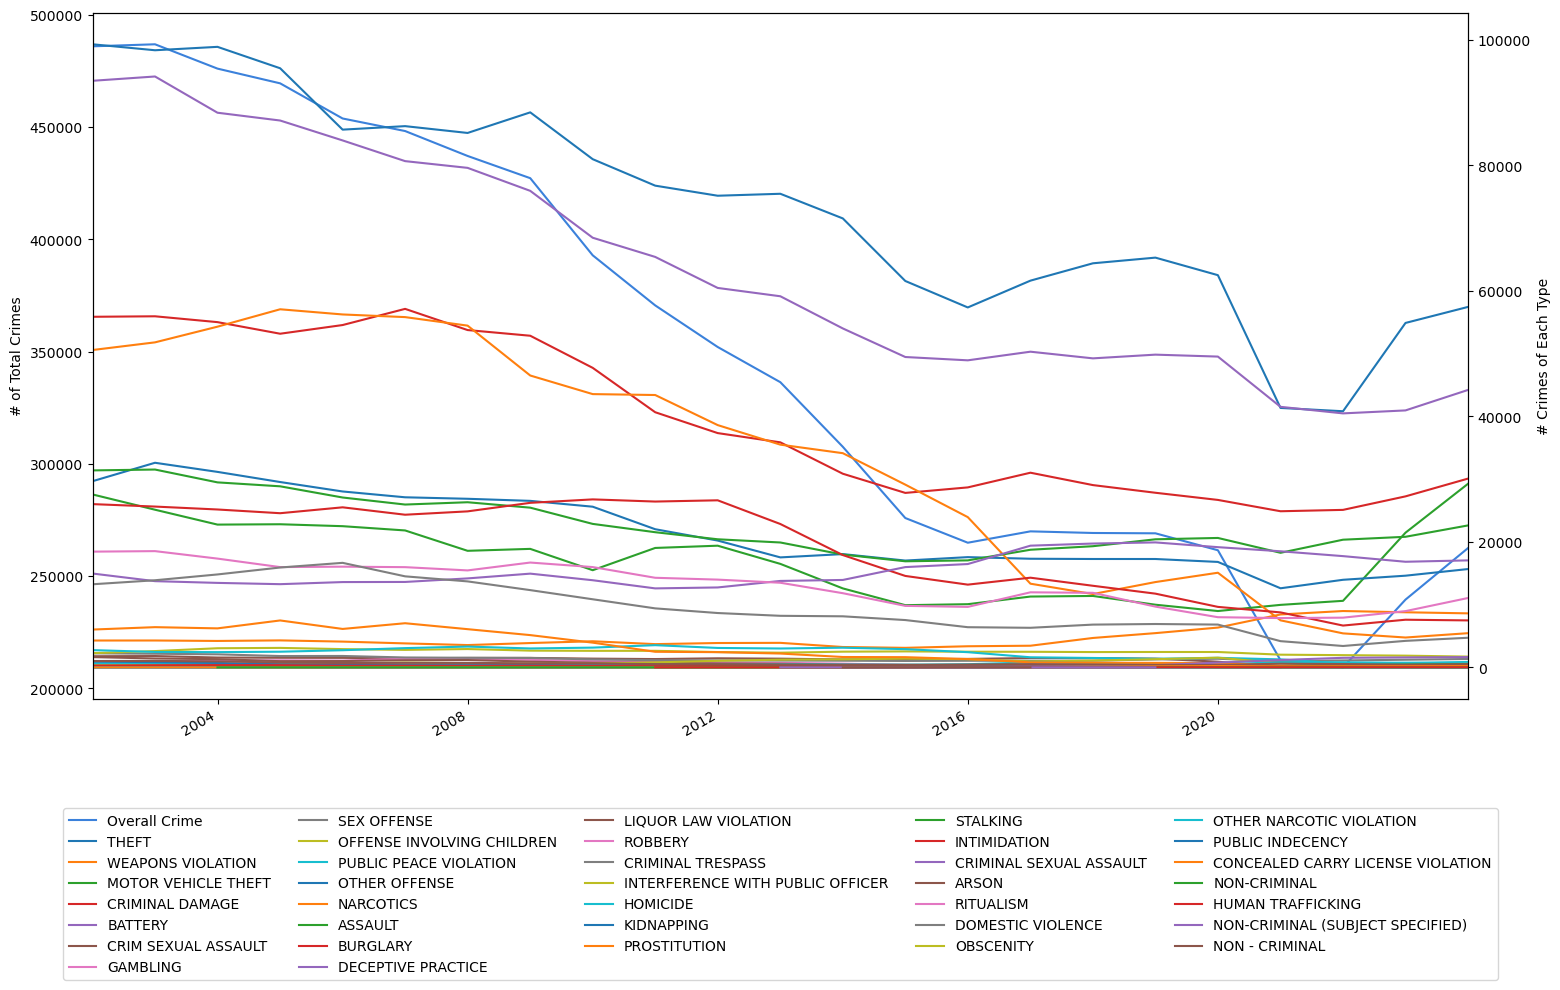

In [66]:
fig, ax1 = plt.subplots(figsize=(16,10))

ax1.plot(crimes_df.index, crimes_df['Overall'], color='#3b81db', label='Overall Crime')
ax1.set_ylabel("# of Total Crimes")

ax2 = ax1.twinx()

for column in crimes_df.columns:
    if column != 'Overall':
        ax2.plot(crimes_df.index, crimes_df[column], label=column)
ax2.set_ylabel("# Crimes of Each Type")


lines = ax1.get_lines() + ax2.get_lines()
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
fig.autofmt_xdate()

plt.margins(x=0)
plt.tight_layout()
plt.show()

* After determing which crime types did not decrease overtime like the overall number of crimes, thme plot shows how these crimes behave compared to the overall number of crimes.
* For example it shows that car theft has behaved similarly to the overall crime trends until 2016, before it stopped decreasing then started increasing again.
* The weapons violation crimes have remained almost the same between 2001 and 2017, then started increasing, unlike the overall number of crimes.
* Other crime types such as stalking, concealed carry license violations, and obscenities have a very small sample of cases that make it difficult to draw conclusions regarding their behavior.

### Checking Seasonality:


In [1]:
df2 = pd.read_csv(r'C:\Users\o2bgo\Downloads\Crimes_-_2001_to_Present_20240907.csv')

NameError: name 'pd' is not defined

In [ ]:
df2 = df2.drop(['X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude','Longitude', 'IUCR','Case Number', 'ID', 'Ward', 'Beat', 'FBI Code', 'Description', 'Domestic','Location', 'Community Area', 'District', 'Arrest', 'Location Description', 'Block'], axis=1)
df2.head()

In [ ]:
date_format = "%m/%d/%Y %H:%M:%S %p"

df2['Date'] = pd.to_datetime(df2['Date'], format=date_format)
df2 = df2.set_index('Date')
df2.head()

In [ ]:
df2 = df2.sort_values('Date')
df2.head()

In [ ]:

pivot_table = df2.pivot_table(index=df2.index, columns='Primary Type', aggfunc='size')

# Group by month and sum the values
monthly_counts = pivot_table.resample('M').sum()


In [ ]:
monthly_counts

In [ ]:
# selecting the top five crimes to vizualize 
top_5 = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT']
top_ts = monthly_counts[top_5].copy()
top_ts.head()

In [ ]:
#converting floats to integrs
top_ts[top_5] = top_ts[top_5].astype(int)
top_ts.head()

In [ ]:
top_ts.isna().sum()

In [ ]:
top_ts.rolling(4).mean().dropna().plot(subplots=True,figsize=(10,12));


*Looking at the top five crime types, we can see that all except narcotic-related crimes have fluctuations that can indicate seasonality to look at in more detail later on. It should be noted that cannabis consumption has been lagalized in Illinois(Chicago) which can explain the decline in narcotic crimes.* 

In [ ]:
import statsmodels.tsa.api as tsa
tsa

In [ ]:
crime_type = "THEFT"
ts_crime = top_ts[crime_type]
decomp = tsa.seasonal_decompose(ts_crime)
decomp

In [ ]:
fig = decomp.plot()
fig.set_size_inches(10,8)
fig.tight_layout()

In [ ]:
seasonal = decomp.seasonal

def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component for {crime_type}');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x',lw=1, color='k')
    ax.grid(which='minor',axis='x',lw=0.5)
    fig.set_size_inches((30, 9))
    fig.autofmt_xdate(rotation=90, ha='center')
    
    return fig, ax

In [ ]:
from scipy.signal import find_peaks
peaks, props = find_peaks(seasonal, height=seasonal.max())

In [ ]:
peak_dates = seasonal.index[peaks]
peak_dates

In [ ]:
period = peak_dates[1] - peak_dates[0]
period

In [ ]:
periods = []
for i in range(len(peak_dates)-1):
    delta = peak_dates[i+1] - peak_dates[i]
    periods.append(delta)
periods

In [ ]:
fig, ax = plot_seasonal(seasonal)
season_start = seasonal.idxmin()
ax.axvspan( season_start, season_start +period, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.legend();

*A cycle in the season lasts for 365 days, which indicates that crimes fluctuate to a degree on an annual basis.*

In [ ]:
seasonal.max() - seasonal.min()


*The analysis also shows that a season has a magnitude of a change in crime numbers of 2,446 theft crimes from the lowest point to the peak of each season.* 

## Part 2- Crime Forcast

In [4]:
!pip install pmdarima
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import pmdarima as pm
from pmdarima.arima.utils import ndiffs, nsdiffs
from pmdarima.model_selection import train_test_split
plt.rcParams['figure.figsize']=(12,3)

#### Additional Custom Functions 

In [5]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)
    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)
    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")
    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)
    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax



In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100
    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")
    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics



In [7]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])



In [8]:
def get_sig_lags(ts, type='ACF',  nlags=None,alpha=0.5):
    

    if type == 'ACF':
        # Running the function used by plot_acf
        corr_values, conf_int = tsa.stattools.acf(ts, alpha=alpha, nlags=nlags)
        
    elif type=='PACF':
        corr_values, conf_int = tsa.stattools.pacf(ts, alpha=alpha, nlags=nlags)
        
    else: 
        raise Exception("type must be either 'ACF' or 'PACF'")
        
    # Determine lags
    lags =range(len(corr_values))
    
    # Create a centered version of the acf_df 
    corr_df = pd.DataFrame({type:corr_values,
                            'Lags':lags,
                            'lower ci': conf_int[:,0]-corr_values, # subtract acf from lower ci to center
                            'upper ci': conf_int[:,1]-corr_values, # subtact acf to upper ci to center
                                 })
    corr_df = corr_df.set_index("Lags")
    
    # Getting filter for sig lags
    filter_sig_lags = (corr_df[type] < corr_df['lower ci']) | (corr_df[type] > corr_df['upper ci'])

    # Get lag #'s 
    sig_lags= corr_df.index[filter_sig_lags]
    sig_lags = sig_lags[sig_lags!=0]

    return sig_lags



In [9]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)



    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()
    
    return fig



#### Preparing data 

In [12]:
date_format = "%m/%d/%Y %H:%M:%S %p"

df['Date'] = pd.to_datetime(df['Date'], format=date_format)
df = df.set_index('Date')
df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 12:00:00,11037294,JA371270,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
2018-12-20 03:00:00,11646293,JC213749,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2016-05-01 12:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2018-12-20 04:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2014-06-01 12:01:00,11645601,JC212935,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [13]:
df = df.sort_values('Date')
df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 01:00:00,1309918,G000412,032XX N SHEFFIELD AV,0820,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1924,...,NaN,NaN,06,1169005.0,1921458.0,2001,08/17/2015 03:03:40 PM,41.940001,-87.654258,"(41.940000996, -87.654258339)"
2001-01-01 01:00:00,1323691,G010990,025XX W ROOSEVELT RD,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,...,NaN,NaN,15,1159886.0,1894673.0,2001,08/17/2015 03:03:40 PM,41.866694,-87.688513,"(41.86669414, -87.688513488)"
2001-01-01 01:00:00,1312557,G001203,109XX S MICHIGAN AV,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,...,NaN,NaN,07,1178895.0,1832264.0,2001,08/17/2015 03:03:40 PM,41.695025,-87.620629,"(41.695024578, -87.620628832)"
2001-01-01 01:00:00,1311626,G001009,023XX S TROY ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1033,...,NaN,NaN,14,1155692.0,1888116.0,2001,08/17/2015 03:03:40 PM,41.848786,-87.704087,"(41.848786421, -87.704086603)"
2001-01-01 01:00:00,1315458,G005079,016XX N HUMBOLDT BL,0820,THEFT,$500 AND UNDER,STREET,False,False,1421,...,NaN,NaN,06,1156090.0,1910543.0,2001,08/17/2015 03:03:40 PM,41.910320,-87.702020,"(41.910320325, -87.702020443)"


In [14]:
crime_list = ['THEFT', 'NARCOTICS']


In [15]:
CRIMES = {}
#Loop through the list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = df.loc[ df['Primary Type']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts)
    # and keep ONLY the .size()
   temp_res = temp.resample("ME").size().interpolate()
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy()
CRIMES.keys()

dict_keys(['THEFT', 'NARCOTICS'])

In [16]:
crimes_df = pd.DataFrame(CRIMES)


In [17]:
crimes_df

,THEFT,NARCOTICS
Date,,
2001-01-31,7867,4714
2001-02-28,6669,4369
2001-03-31,7767,4862
2001-04-30,7702,4044
2001-05-31,8421,4038
...,...,...
2024-04-30,4518,424
2024-05-31,5164,413
2024-06-30,5440,435


In [18]:
# Checking for null values 
crimes_df.isna().sum()

THEFT        0
NARCOTICS    0
dtype: int64

#### Checking seasonality, stationarity, and autocorrelation 

In [19]:
ts1 = crimes_df['THEFT']

In [20]:
ts2 = crimes_df['NARCOTICS']

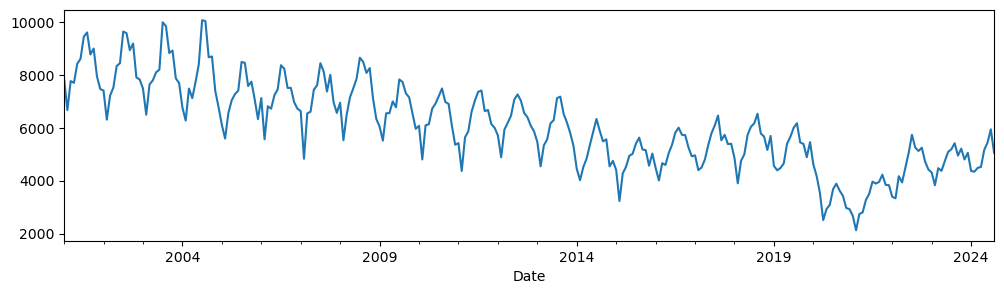

In [21]:
ax = ts1.plot()


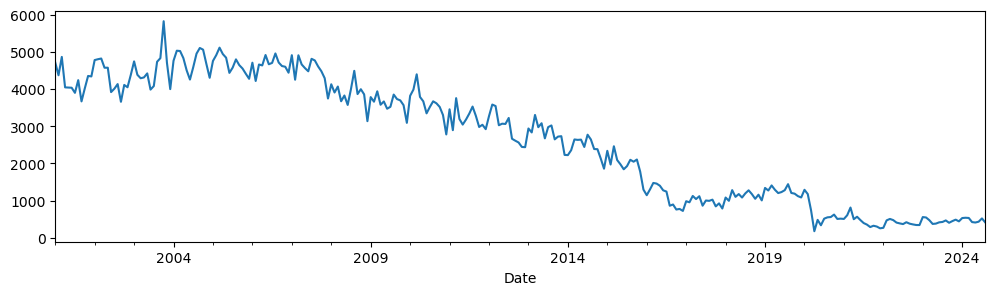

In [22]:
ax = ts2.plot()


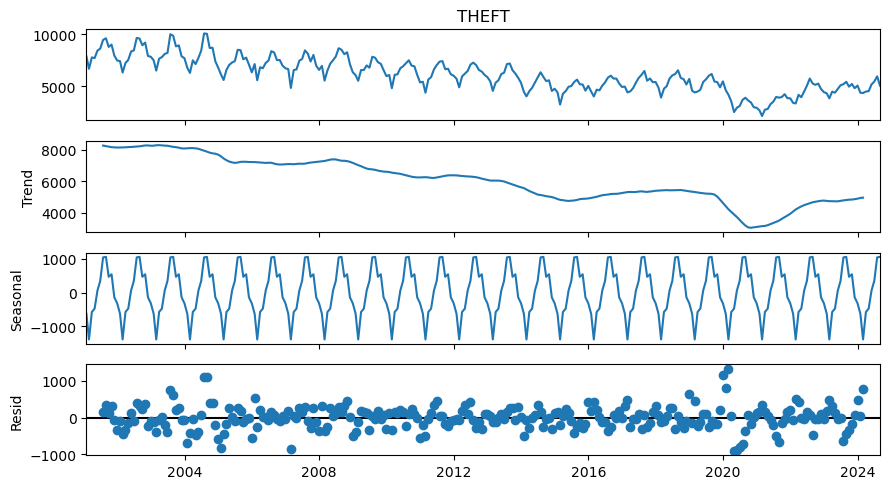

In [23]:
decomp1 = tsa.seasonal_decompose(ts1)
fig = decomp1.plot()
fig.set_size_inches(9, 5)
fig.tight_layout()

In [24]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(ts1.max()-ts1.min()) * 100 :.2f}% of the variation in time series.")



NameError: name 'decomp' is not defined

In [ ]:
seasonal = decomp1.seasonal
ax = seasonal.loc['2016': '2020'].plot(marker = 'o')

*The seasonal analysis shows that a significant part of the variance in the data related to theft can be explained by seasonality.*

In [ ]:
# determine d for THEFT
d = ndiffs(ts1)
print (f'd = {d}')
# Determine D for THEFT
D = nsdiffs(ts1, m =12)
print(f'D = {D}')


In [ ]:
decomp2 = tsa.seasonal_decompose(ts2)
fig = decomp2.plot()
fig.set_size_inches(9, 5)
fig.tight_layout()

In [ ]:
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(ts2.max()-ts2.min()) * 100 :.2f}% of the variation in time series.")

In [ ]:
seasonal = decomp2.seasonal
ax = seasonal.loc['2016': '2020'].plot(marker = 'o')

In [ ]:
# determine d for NARCOTICS
d = ndiffs(ts2)
print (f'd = {d}')
# Determine D for NARCOTICS
D = nsdiffs(ts2, m =12)
print(f'D = {D}')


*The seasonal component is present in the Narcotics-related crimes is present but not as significant as the Theft data.* 

* Seasonal differncing is required for both types of crimes.
* Both seasons are annual (12 months
* Both require a nonseasonal differincing of 1 and a seasonal differincing of 0 

In [ ]:
# Check for stationarity of THEFT 
get_adfuller_results(ts1)

In [ ]:
# Check for stationarity of NARCOTICS 
get_adfuller_results(ts2)

In [ ]:
ts_diff1 = ts1.diff().dropna()
ts_diff2 = ts2.diff().dropna()

In [ ]:
plot_acf_pacf(ts_diff1, annotate_seas=True, m = 12);


In [ ]:
plot_acf_pacf(ts_diff2, annotate_seas=True, m = 12);


*Both the seasonal and non-seasonal components drop gradually for both crime types, therefore a SARIMA model will be used for both.* 

#### Splitting both crime types to train and test 

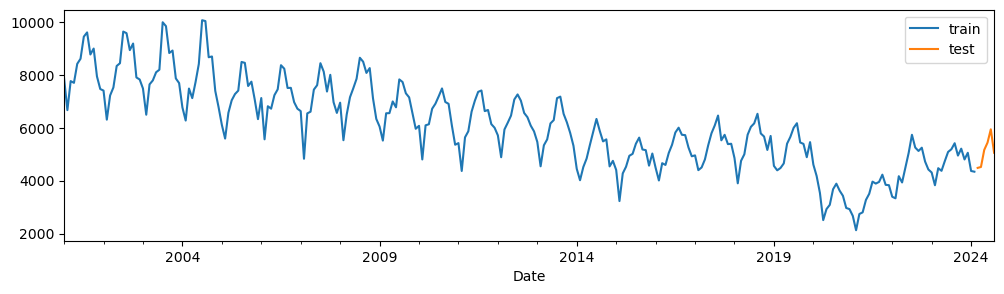

In [27]:
from pmdarima.model_selection import train_test_split
train1, test1 = train_test_split(ts1, test_size= 6)

ax = train1.plot(label="train")
test1.plot(label="test")
ax.legend();

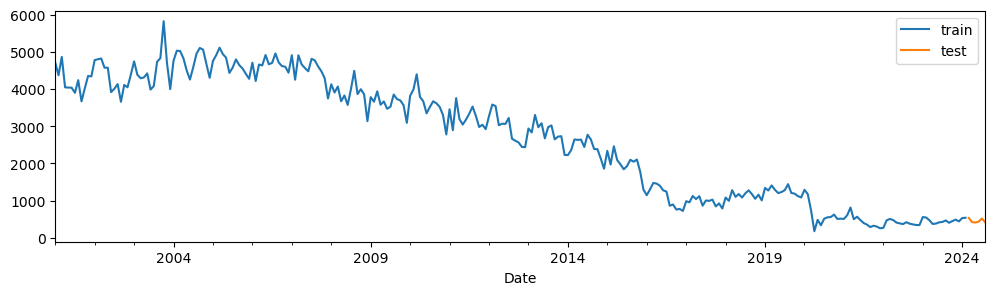

In [28]:
train2, test2 = train_test_split(ts2, test_size= 6)

ax = train2.plot(label="train")
test2.plot(label="test")
ax.legend();

#### Creating initial models 

In [29]:
# Orders for non seasonal components for both types
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1 # nonseasonal MA

# Orders for seasonal components (if seasonal model)
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

In [30]:
sarima1 = tsa.ARIMA(train1, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()


In [31]:
sarima2 = tsa.ARIMA(train2, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()


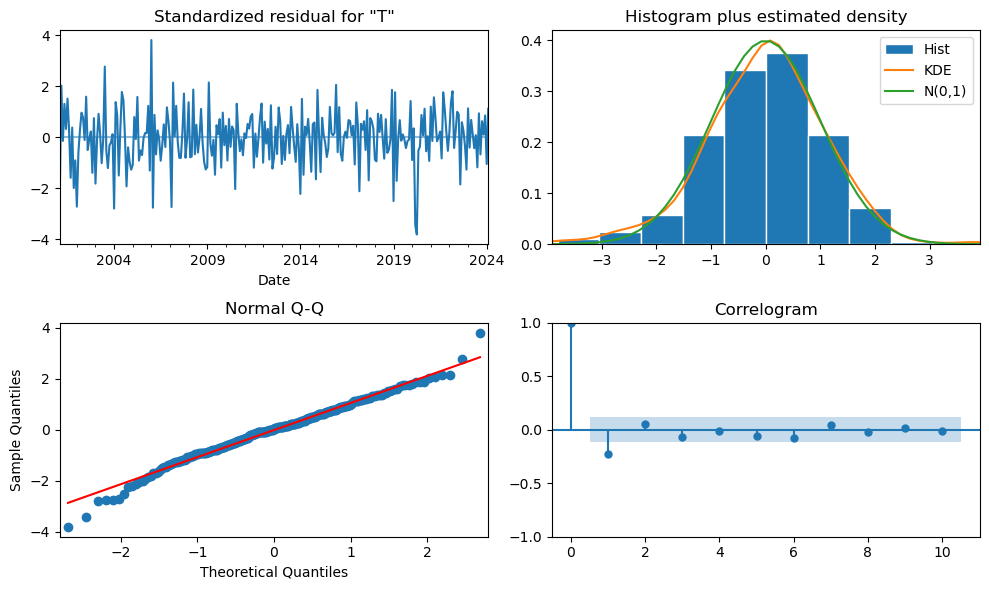

In [32]:
fig = sarima1.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

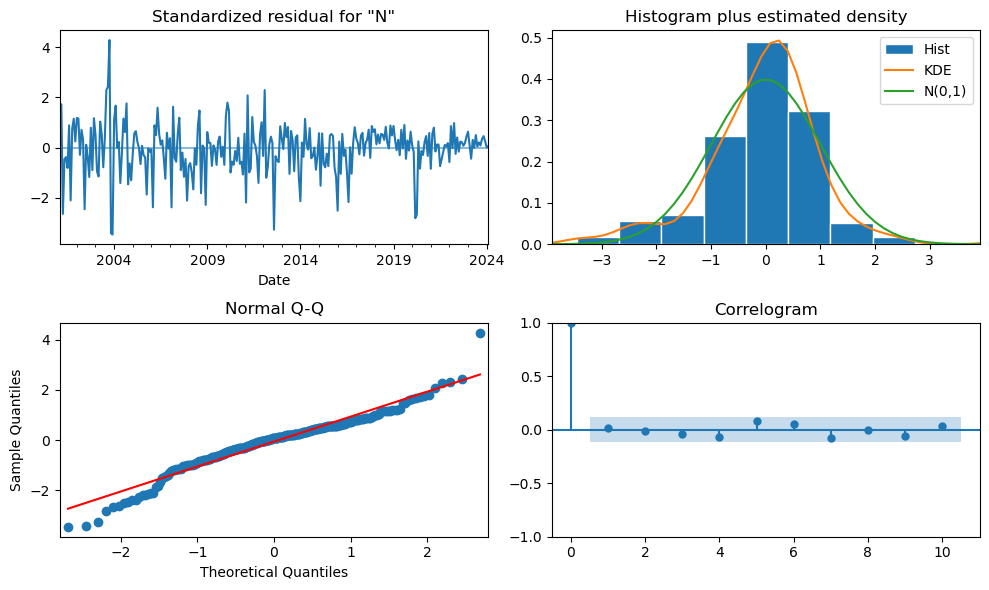

In [33]:
fig = sarima2.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

*Both models fit generally well on the data.* 

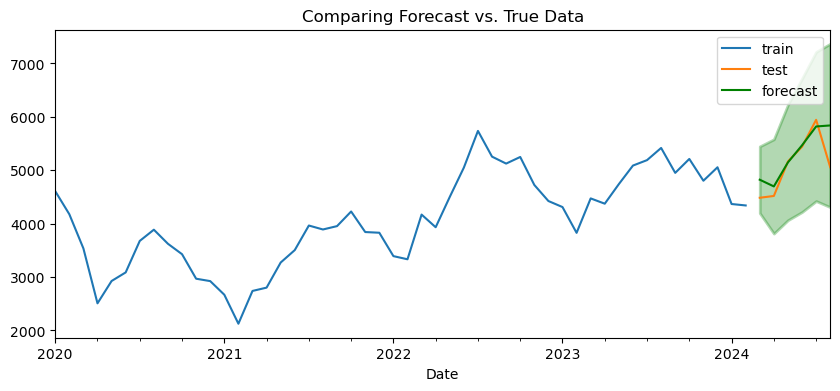

In [34]:
forecast_df = sarima1.get_forecast(len(test1)).summary_frame()
# Plot the forecast with true values
plot_forecast(train1, test1, forecast_df, n_train_lags = 50);

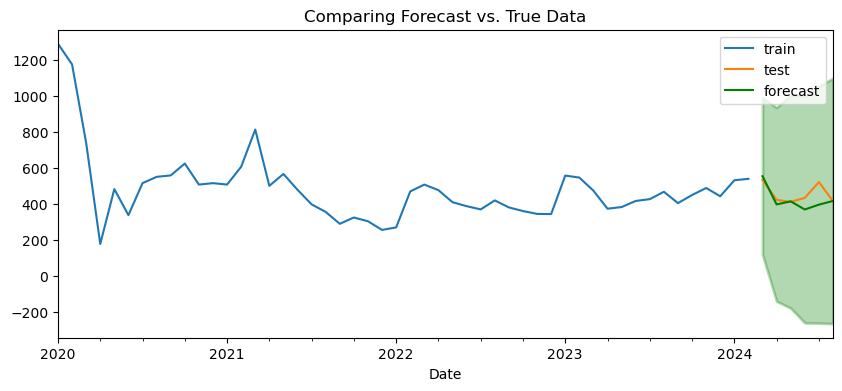

In [35]:
forecast_df2 = sarima2.get_forecast(len(test2)).summary_frame()
# Plot the forecast with true values
plot_forecast(train2, test2, forecast_df2, n_train_lags = 50);

In [36]:
regression_metrics_ts(test1, forecast_df["mean"])

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 244.640
- MSE = 129,160.021
- RMSE = 359.388
- R^2 = 0.501
- MAPE = 4.98%


C:\Users\o2bgo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
regression_metrics_ts(test2, forecast_df2["mean"])

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 39.927
- MSE = 3,501.646
- RMSE = 59.175
- R^2 = -0.352
- MAPE = 8.25%


C:\Users\o2bgo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


*Both models can forecast crime rates for theft and narcotics relatively well with an expected margain of error of about %5 and %8 respectively.* 

#### Tuning the models

In [38]:
auto_model1 = pm.auto_arima(
    train1,
    seasonal=True,  
    m=12,
    trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4352.765, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4078.004, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4210.410, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4350.884, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4352.822, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4056.359, Time=0.50 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=4023.138, Time=1.25 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=4023.367, Time=0.49 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=4022.446, Time=1.13 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=4161.159, Time=0.50 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=4209.225, Time=0.21 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=4037.694, Time=1.18 sec
 ARIMA(2,1,0)(1,0,2)[12] inte

In [39]:
auto_model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  278
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -2005.396
Date:                                 Sat, 21 Sep 2024   AIC                           4020.793
Time:                                         13:06:10   BIC                           4038.913
Sample:                                     01-31-2001   HQIC                          4028.063
                                          - 02-29-2024                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2410      0.044     -5.473      0.000      -0.327      -0.155
ar.S.L12       0.9786      0.008    129.767      0.000       0.964       0.993
ma.S.L12      -0.5936      0.057    -10.343      0.000      -0.706      -0.481
ma.S.L24      -0.1084      0.066     -1.645      0.100      -0.238       0.021
sigma2      1.007e+05   6844.211     14.714      0.000    8.73e+04    1.14e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                36.90
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.46
Prob(H) (two-sided):                  0.28   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

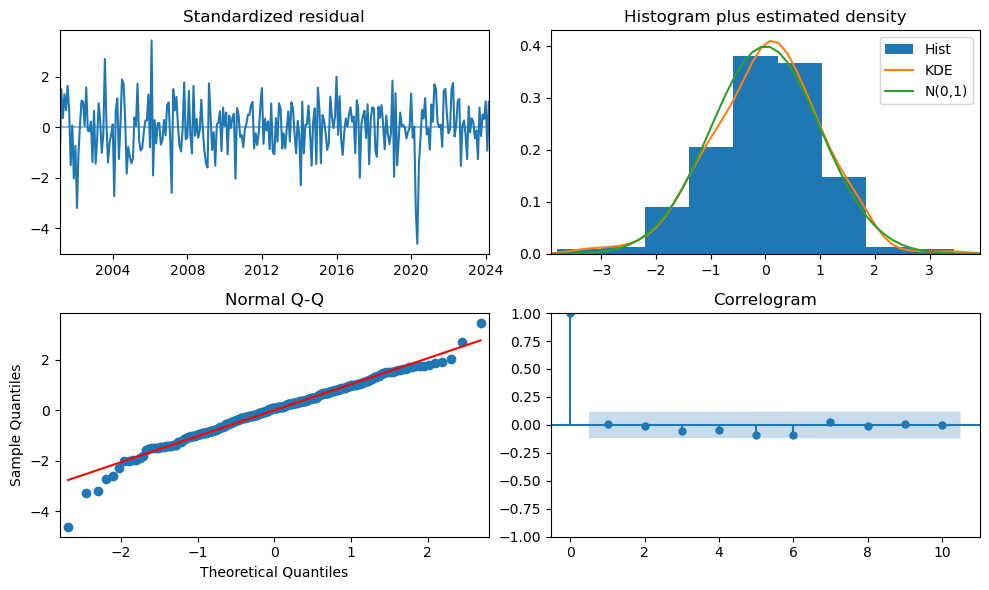

In [40]:
fig = auto_model1.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

C:\Users\o2bgo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 245.215
- MSE = 113,528.094
- RMSE = 336.939
- R^2 = 0.561
- MAPE = 4.88%


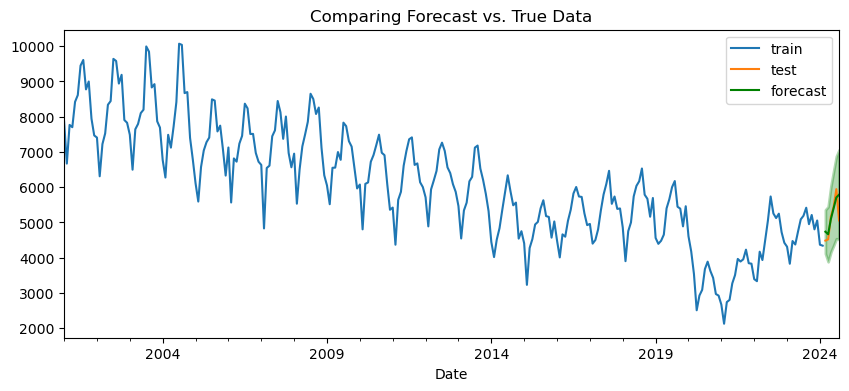

In [41]:
auto_model1 = tsa.ARIMA(train1, order=(1,1,0), seasonal_order= (1,0,2,12)).fit()

# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_model1.get_forecast(steps=len(test1)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train1, test1, forecast_df);
# Obtain metrics
regression_metrics_ts(test1, forecast_df['mean'])


#### Tuning Narcotics model

In [42]:
auto_model2 = pm.auto_arima(
    train2,
    seasonal=True,  
    m=12,
    trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3934.597, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3843.001, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3855.809, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3933.334, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3906.904, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3835.623, Time=0.61 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3816.218, Time=1.42 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3816.080, Time=0.42 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3863.328, Time=0.25 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3815.848, Time=1.35 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3849.924, Time=0.41 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3823.682, Time=1.17 sec
 ARIMA(2,1,0)(1,0,2)[12] inte

In [43]:
auto_model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  278
Model:             SARIMAX(4, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1892.045
Date:                              Sat, 21 Sep 2024   AIC                           3798.091
Time:                                      13:07:53   BIC                           3823.459
Sample:                                  01-31-2001   HQIC                          3808.269
                                       - 02-29-2024                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2518      0.039     -6.423      0.000      -0.329      -0.175
ar.L2         -0.1871      0.049     -3.802      0.000      -0.283      -0.091
ar.L3         -0.2037      0.054     -3.746      0.000      -0.310      -0.097
ar.L4         -0.1960      0.057     -3.468      0.001      -0.307      -0.085
ar.S.L12       0.9359      0.030     31.250      0.000       0.877       0.995
ma.S.L12      -0.7124      0.076     -9.427      0.000      -0.860      -0.564
sigma2      4.937e+04   3168.647     15.581      0.000    4.32e+04    5.56e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                57.70
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

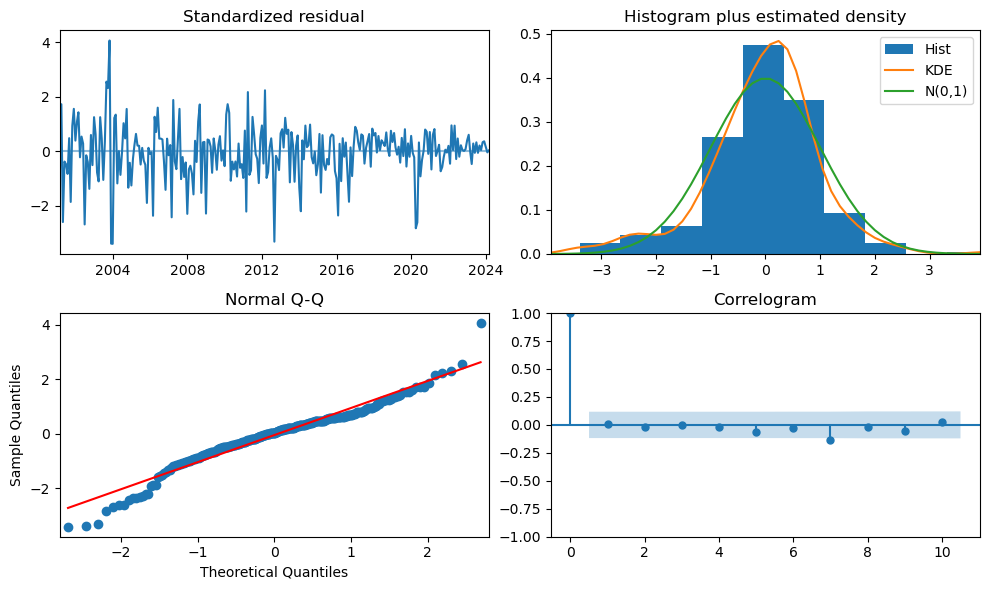

In [44]:
fig = auto_model2.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 36.296
- MSE = 1,910.269
- RMSE = 43.707
- R^2 = 0.263
- MAPE = 7.80%


C:\Users\o2bgo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


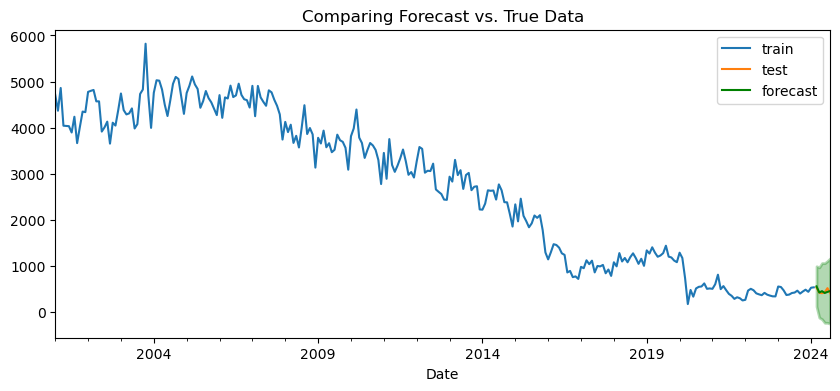

In [46]:
auto_model2 = tsa.ARIMA(train2, order=(4,1,0), seasonal_order= (1,0,1,12)).fit()

# Obtain forecast as a dataframe with confidence intervals
forecast_df2 = auto_model2.get_forecast(steps=len(test2)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train2, test2, forecast_df2);
# Obtain metrics
regression_metrics_ts(test2, forecast_df2['mean'])

*For both crime types the tuned models have performed better with improved MAPE on both. However, unlike the Theft model, the model for narcotics has performed slightly worse in terms of R2 score. Despite that , the tuned narcotics model still performed better in other metrics, which makes it better at forecasting future crime data.* 

#### Forecasting future crime rates 

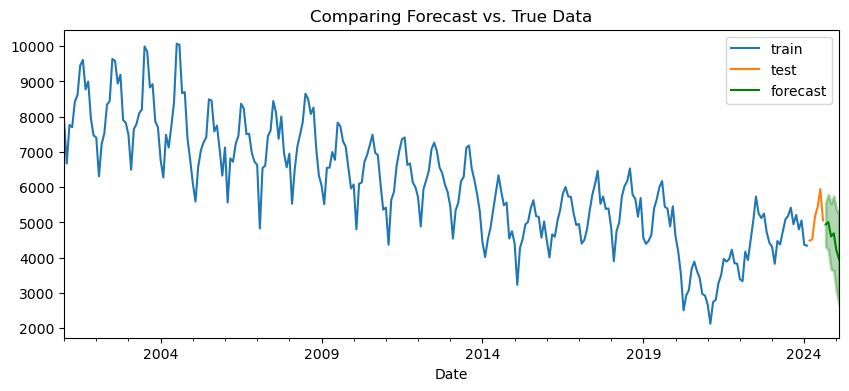

In [51]:
final_model1 = tsa.ARIMA(ts1, order = (1,1,0), seasonal_order=(1,0,2,12)).fit()
forecast_1  = final_model1.get_forecast(len(test1)).summary_frame()
plot_forecast(train1,test1,forecast_1);


In [52]:
forecast_1.index[0],forecast_1.index[-1]

(Timestamp('2024-09-30 00:00:00'), Timestamp('2025-02-28 00:00:00'))

In [63]:
final_value

3949.7733477081797

In [61]:
starting_value = forecast_1['mean'].iloc[0]
final_value = forecast_1['mean'].iloc[-1]
# Change in x
delta = final_value - starting_value
print(f'The month change in theft forcasted after six months on {forecast_1.index[-1]}   is {delta: .2f}.')
perc_change = (delta/starting_value) *100
print (f'The percentage change in theft by  {forecast_1.index[-1]} is an decrease of {perc_change :.2f}%.')

The month change in theft forcasted after six months on 2025-02-28 00:00:00   is -992.57.
The percentage change in theft by  2025-02-28 00:00:00 is an decrease of -20.08%.


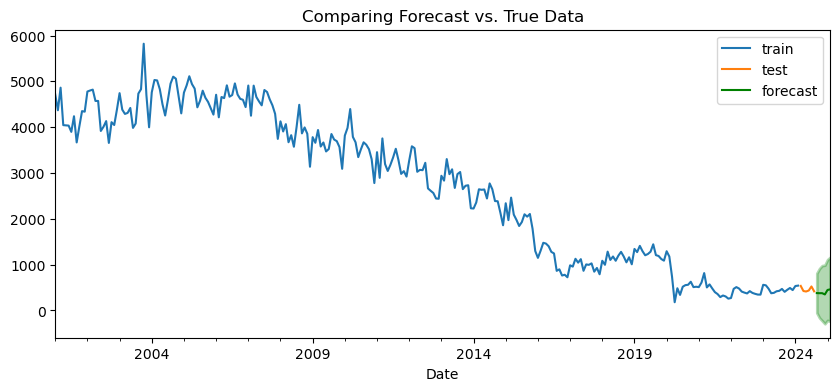

In [54]:
final_model2 = tsa.ARIMA(ts2, order = (4,1,0), seasonal_order=(1,0,1,12)).fit()
forecast_2  = final_model2.get_forecast(len(test2)).summary_frame()
plot_forecast(train2,test2,forecast_2);

In [59]:
starting_value2 = forecast_2['mean'].iloc[0]
final_value2 = forecast_2['mean'].iloc[-1]
# Change in x
delta2 = final_value2 - starting_value2
print(f'The month change in narcotics crimes forcasted after six months on {forecast_1.index[-1]}   is {delta2: .2f}.')
perc_change2 = (delta2/starting_value2) *100
print (f'The percentage change in narcotic crimes by  {forecast_1.index[-1]} is an increase of {perc_change2 :.2f}%.')

The month change in narcotics crimes forcasted after six months on 2025-02-28 00:00:00   is  81.10.
The percentage change in narcotic crimes by  2025-02-28 00:00:00 is an increase of 21.41%.


#### Final Evaluation

* Of the two crimes, which is forecasted to have the highest monthly count of crimes at the end of the forecast?

*Theft*
* 
Of the two crimes, which is forecasted to have the highest net change by the end of the forecast

*Theft*

* 
Of the two crimes, which is forecasted to have the highest percent change by the end of the forecas

*Narcotics*t?

#### Recommendations

* Both models are valid for forcasting crime trends.
* Both models can account for seasonality in the data and can fit it in forecasting.
